In [123]:
import pandas as pd
import numpy as np
from ofxparse import OfxParser
import matplotlib.pyplot as plt
import os
from datetime import datetime

# load in the data
df = pd.read_pickle("transactions.pkl")

In [124]:
df

,index,date,year,month,day,description,debit,credit,weekdays
0,0,2018-01-18,2018,1,18,POS 15533600 18 JAN,0.0,188.0,fri
1,1,2018-01-19,2018,1,19,POS 15533600 19 JAN,0.0,75.0,sat
2,2,2018-01-20,2018,1,20,POS 15533600 20 JAN,0.0,359.0,sun
3,3,2018-01-21,2018,1,21,POS 15533600 21 JAN,0.0,230.0,mon
4,4,2018-01-22,2018,1,22,POS 15533600 22 JAN,0.0,60.0,tue
...,...,...,...,...,...,...,...,...,...
1255,1168,2020-07-17,2020,7,17,POS 15533600 17 JUL,0.0,122.0,sat
1256,1169,2020-07-18,2020,7,18,POS 15533600 18 JUL,0.0,148.0,sun
1257,1170,2020-07-19,2020,7,19,POS 15533600 19 JUL,0.0,181.0,mon
1258,1171,2020-07-20,2020,7,20,POS 15533600 20 JUL,0.0,241.0,tue


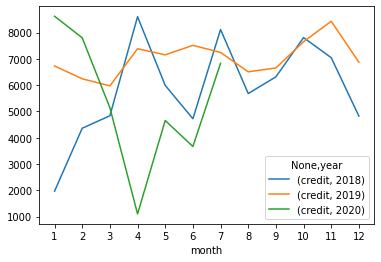

In [3]:
# transactions by month
dff = df[~(df.credit == 0)][['date', 'year', 'month', 'credit']]
monthly_transactions = dff.groupby(['month', 'year']).sum().unstack().plot()
plt.xticks([i for i in range(1, 13)])
plt.show()

In [4]:
# transactions by days
plt.figure(figsize=(14,8))
dff = df[~(df.credit == 0) & (df.year==2019)][['date', 'year', 'day', 'month', 'credit']]
daily_transactions = dff.groupby(['day', 'year']).sum().unstack()
daily_transactions
# daily_transactions.plot()
# plt.xticks([i for i in range(1, 31)])
# plt.show()

,month,credit
year,2019,2019
day,,
1,77,2786.50
2,78,3326.50
3,78,3350.50
4,78,3061.50
5,78,2174.00
6,71,2210.00
7,81,2793.00
8,78,2734.50


<Figure size 1008x576 with 0 Axes>

In [7]:
temp = df.drop(df[df.credit == 3000].index, axis=0)
print(temp[(temp.month == 7) & (temp.year == 2020)].sum()['credit'])
print(df[(df.month == 7) & (df.year == 2020)].sum()['credit'])

3832.5
6832.5


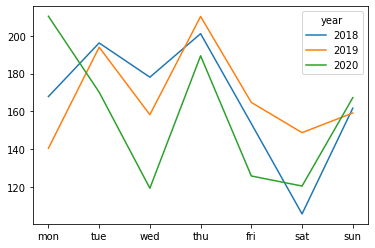

In [6]:
# transactions by weekdays
x = df.groupby(['weekdays', 'year'])['credit'].mean().unstack()
x.index = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
x.plot()
plt.show()